# Drug Consumption Classification Dataset

_https://www.kaggle.com/datasets/mexwell/drug-consumption-classification/data_

### Starter Notebook
_https://www.kaggle.com/code/mexwell/starter-notebook-convert-column-values_

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day. Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/drug_consumption_cleaned.csv')

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [4]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df = data[["Gender"] + drugs]

df.head()

,Gender,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,Female,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,Male,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,Male,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,Female,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,Female,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [5]:
def get_drug_consumption_by_gender(df: pd.DataFrame, drug: str = 'Alcohol') -> None:
    """
    Function to display a bar chart showing the difference of drug consumption between men and women.
    
    Parameters:
    - df: pandas DataFrame containing the dataset
    - drugs: list of drugs to compare
    """
    if drug not in drugs:
        raise ValueError(f'{drug} not in the list of drugs. Please choose from: {drugs}')
    
    men_data = df[df['Gender'] == 'Male']
    women_data = df[df['Gender'] == 'Female']

    men_count = men_data[drug].value_counts()
    women_count = women_data[drug].value_counts()

    combined_counts = pd.DataFrame({'Men': men_count, 'Women': women_count})

    # Plot the bar chart
    combined_counts.plot(kind='bar', figsize=(10, 6))
    plt.xlabel(f'{drug.capitalize()} Consumption Category')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.title(f'{drug.capitalize()} Consumption by Gender')
    plt.legend(title='Gender')
    plt.show()

Alcohol
Used in Last Week         403
Used in Last Day          230
Used in Last Month        152
Used in Last Year          93
Used in Last Decade        32
Used over a Decade Ago     17
Never Used                 15
Name: count, dtype: int64


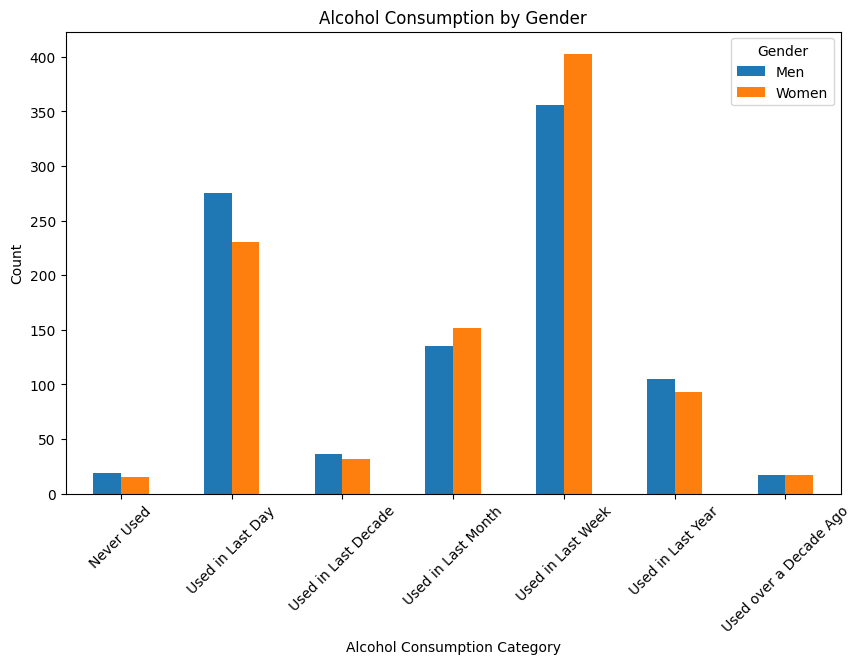

Coke
Never Used                596
Used in Last Decade       124
Used in Last Year          90
Used over a Decade Ago     76
Used in Last Month         37
Used in Last Week          14
Used in Last Day            5
Name: count, dtype: int64


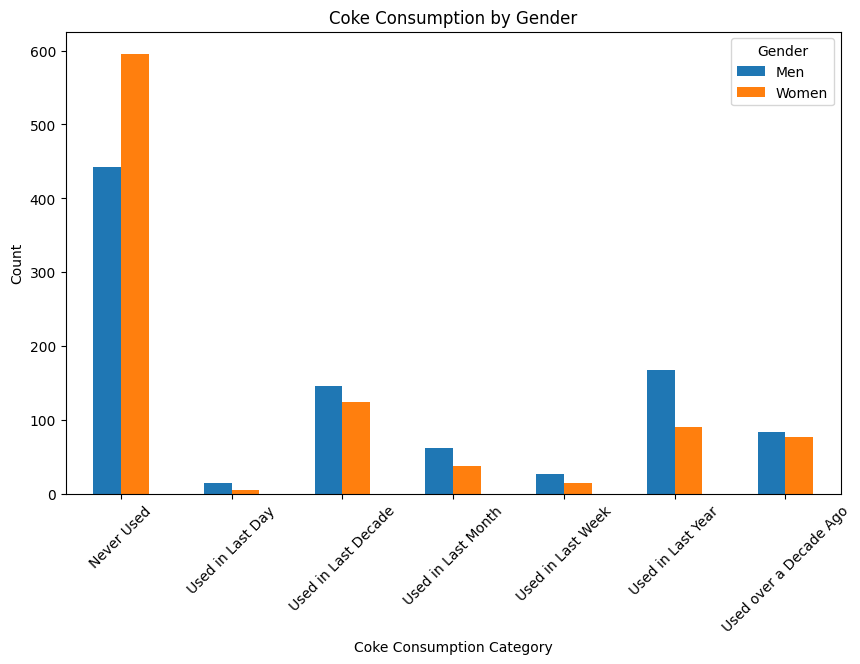

Heroin
Never Used                845
Used in Last Decade        33
Used over a Decade Ago     31
Used in Last Year          19
Used in Last Month          8
Used in Last Day            3
Used in Last Week           3
Name: count, dtype: int64


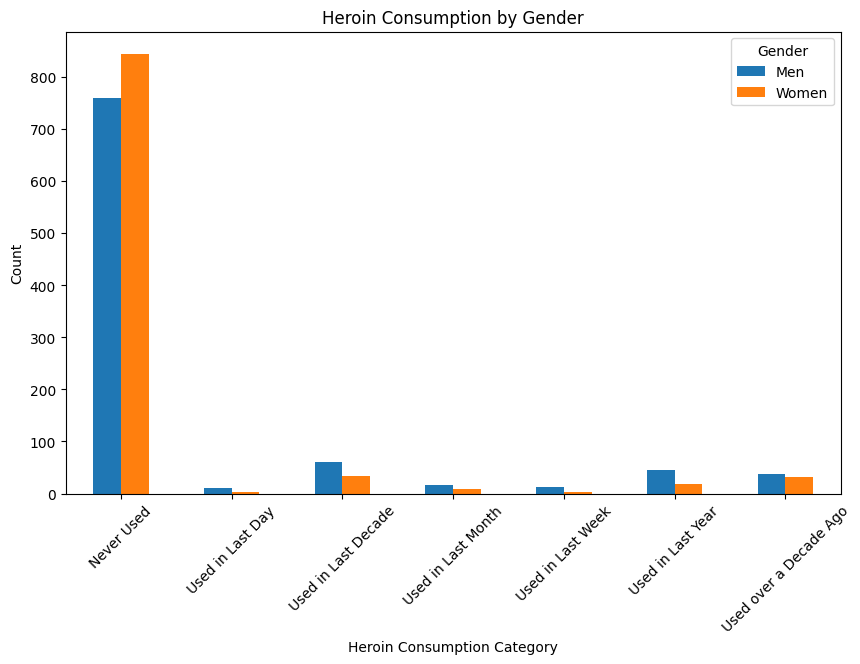

Meth
Never Used                789
Used in Last Year          40
Used in Last Decade        39
Used in Last Day           20
Used in Last Month         19
Used over a Decade Ago     18
Used in Last Week          17
Name: count, dtype: int64


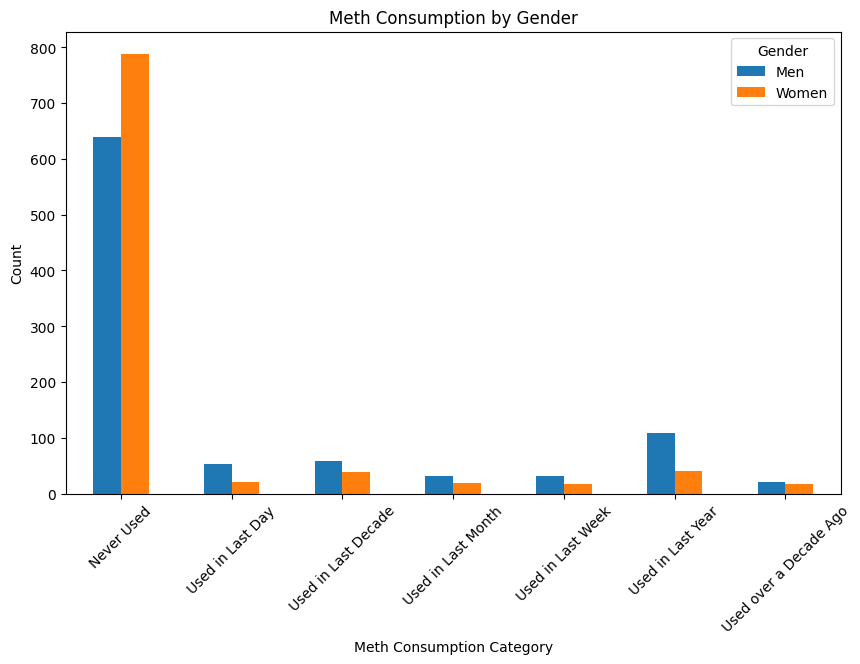

In [6]:
for drug in ['Alcohol', 'Coke', 'Heroin', 'Meth']:
        get_drug_consumption_by_gender(df, drug)